In [89]:
# Step 1: Load the dataset.

# Step 2: Display the first few rows of the dataset to understand the data structure, column values, and sample entries.

# Step 3: Inspect the dataset using df.info() to determine the number of rows, data types of each column, memory usage, and identify columns with missing values.

# Step 4: Review all column names to ensure they are correctly labeled and consistent.

# Step 5: Check for missing values in each column using df.isna().sum() to identify incomplete data.

# Step 6: Remove the Profession column since it contains missing values and is not required for the analysis.

# Step 7: Recheck the dataset after dropping the column to confirm successful removal and data consistency.

# Step 8: Create a new column called "Age Group" by categorizing customer ages into predefined age ranges.

# Step 9: Validate the Age Group column by previewing the dataset and ensuring correct age classification.

# Step 10: Check missing values again after feature engineering to confirm the Age Group column has no null values.

# Step 11: Handle remaining missing values by removing rows with missing Season data to fully clean the dataset.

# Step 12: Perform a final missing value check to ensure all columns contain complete data.

# Step 13: Examine the number of unique values in selected columns to understand data diversity.

# Step 14: Generate descriptive statistics using df.describe() for numeric columns such as CustomerID, Age, and Purchase Amount.

# Step 15: Interpret the statistical summary to analyze customer age distribution and purchasing behavior.

In [90]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [91]:
df = pd.read_csv('Customer.csv')

In [92]:
df.head()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Profession,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Healthcare,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,Engineer,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Engineer,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,Lawyer,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Entertainment,Yes,Winter,United States


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           2005 non-null   int64 
 1   Gender               2005 non-null   object
 2   Age                  2005 non-null   int64 
 3   Items Purchased      2005 non-null   object
 4   Category             2005 non-null   object
 5   Purchase Amount      2005 non-null   int64 
 6   Shipping Type        2005 non-null   object
 7   Profession           1970 non-null   object
 8   Subscription Status  2005 non-null   object
 9   Season               1976 non-null   object
 10  Country              2005 non-null   object
dtypes: int64(3), object(8)
memory usage: 172.4+ KB


In [94]:
list(df.columns)

['CustomerID',
 'Gender',
 'Age',
 'Items Purchased',
 'Category',
 'Purchase Amount',
 'Shipping Type',
 'Profession',
 'Subscription Status',
 'Season',
 'Country']

In [95]:
df.isnull().sum()

CustomerID              0
Gender                  0
Age                     0
Items Purchased         0
Category                0
Purchase Amount         0
Shipping Type           0
Profession             35
Subscription Status     0
Season                 29
Country                 0
dtype: int64

In [96]:
df.drop(columns=['Profession'], inplace=True) 
df.head()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Yes,Winter,United States


In [97]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 55, 65, float('inf')],
                         labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'], 
                         include_lowest=True)

In [98]:
df.head()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Subscription Status,Season,Country,Age Group
0,1,Male,18,Blouse,Clothing,50,Express,Yes,Spring,United States,Under 18
1,2,Male,20,Sweater,Clothing,25,Free Shipping,No,Summer,United States,18-24
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Yes,Fall,United States,25-34
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,No,Winter,United States,35-44
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Yes,Winter,United States,55-64


In [99]:
df.isna().sum()

CustomerID              0
Gender                  0
Age                     0
Items Purchased         0
Category                0
Purchase Amount         0
Shipping Type           0
Subscription Status     0
Season                 29
Country                 0
Age Group               0
dtype: int64

In [100]:
df = df.dropna(subset=['Season'])

In [101]:
df.isna().sum()

CustomerID             0
Gender                 0
Age                    0
Items Purchased        0
Category               0
Purchase Amount        0
Shipping Type          0
Subscription Status    0
Season                 0
Country                0
Age Group              0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerID           1976 non-null   int64   
 1   Gender               1976 non-null   object  
 2   Age                  1976 non-null   int64   
 3   Items Purchased      1976 non-null   object  
 4   Category             1976 non-null   object  
 5   Purchase Amount      1976 non-null   int64   
 6   Shipping Type        1976 non-null   object  
 7   Subscription Status  1976 non-null   object  
 8   Season               1976 non-null   object  
 9   Country              1976 non-null   object  
 10  Age Group            1976 non-null   category
dtypes: category(1), int64(3), object(7)
memory usage: 172.1+ KB


In [103]:
df.duplicated('CustomerID').sum()

np.int64(5)

In [104]:
df.drop_duplicates(subset='CustomerID', inplace=True)
df.duplicated('CustomerID').sum()

np.int64(0)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerID           1971 non-null   int64   
 1   Gender               1971 non-null   object  
 2   Age                  1971 non-null   int64   
 3   Items Purchased      1971 non-null   object  
 4   Category             1971 non-null   object  
 5   Purchase Amount      1971 non-null   int64   
 6   Shipping Type        1971 non-null   object  
 7   Subscription Status  1971 non-null   object  
 8   Season               1971 non-null   object  
 9   Country              1971 non-null   object  
 10  Age Group            1971 non-null   category
dtypes: category(1), int64(3), object(7)
memory usage: 171.7+ KB


In [106]:
df.describe()

,CustomerID,Age,Purchase Amount
count,1971.000000,1971.000000,1971.000000
mean,1013.008625,29.548453,52.505835
std,572.332033,13.123082,29.340870
min,1.000000,18.000000,12.000000
25%,522.500000,22.000000,23.000000
50%,1015.000000,22.000000,50.000000
75%,1507.500000,33.000000,77.000000
max,2000.000000,74.000000,100.000000


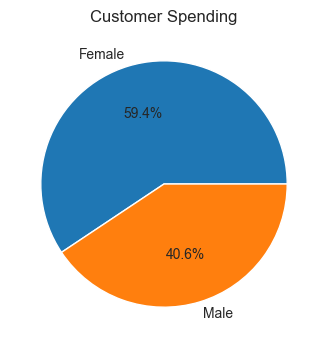

In [111]:
sns.set_style('darkgrid')
plt.figure(figsize=(6,4))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Customer Spending')
plt.show()

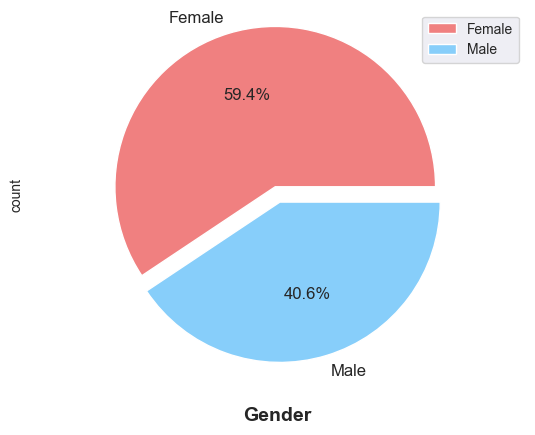

In [115]:
colors = ['lightcoral', 'lightskyblue', 'gold']

counts = df['Gender'].value_counts()
explode = (0,0.1)

counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%1.1f%%', colors=colors)
plt.xlabel('Gender', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best") 
plt.show()

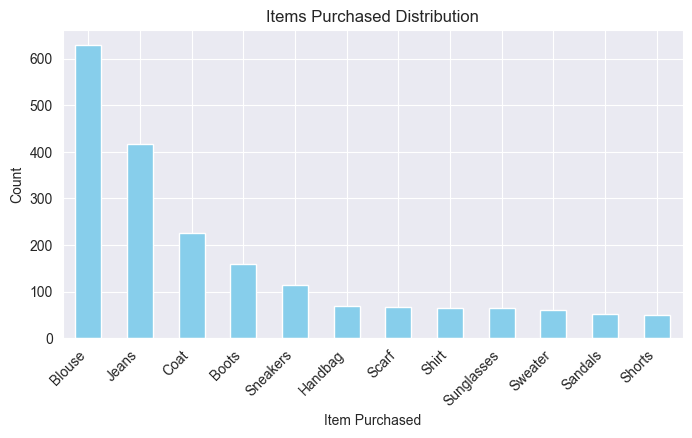

In [120]:
item_counts = df['Items Purchased'].value_counts()

plt.figure(figsize=(8,4))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Items Purchased Distribution')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


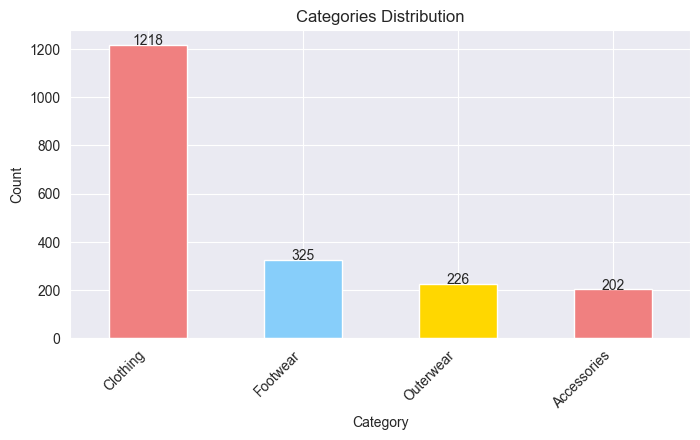

In [121]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8,4))
bars = category_counts.plot(kind='bar', color=colors)

for bar, count in zip(bars.patches, category_counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        str(count),
        ha='center',
        fontsize=10
    )

plt.title('Categories Distribution') 
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

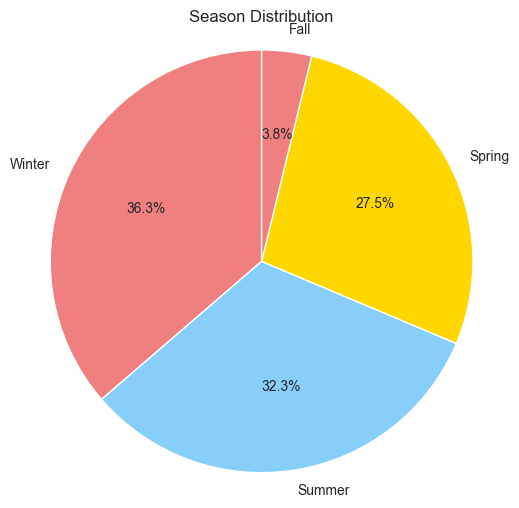

In [129]:
season_counts = df['Season'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Season Distribution')
plt.axis('equal')
plt.show()

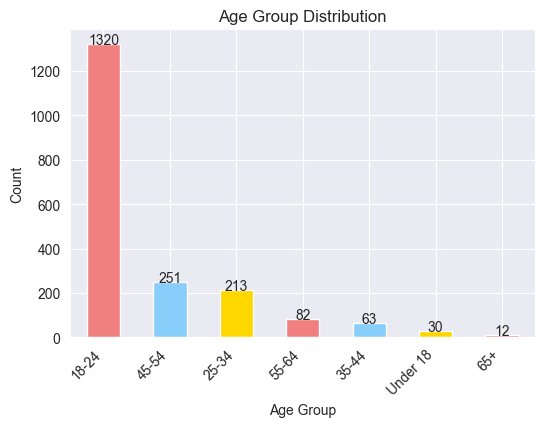

In [ ]:
age_group_counts = df['Age Group'].value_counts()

plt.figure(figsize=(6,4))
bars = age_group_counts.plot(kind='bar', color=colors)

for bar, count in zip(bars.patches, age_group_counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        str(count),
        ha='center',
        fontsize=10
    )

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


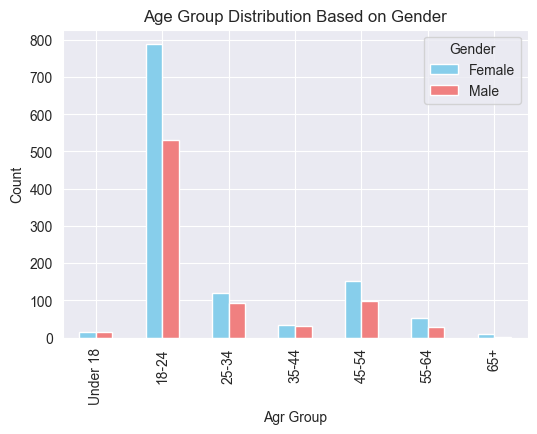

In [ ]:
pivot_df = df.pivot_table(index='Age Group', columns='Gender', aggfunc='size', fill_value=0)

ax = pivot_df.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(6,4))

ax.set_title('Age Group Distribution Based on Gender')
ax.set_xlabel('Agr Group')
ax.set_ylabel('Count')
ax.legend(title='Gender')
plt.show()